Tamanho do conjunto de treino: 3755
Tamanho do conjunto de teste: 939
Mean Squared Error (Regressão Linear): 1.9017142520730665
Modelos salvos com sucesso!
Mean Squared Error (MLP): 1.9050970845531519


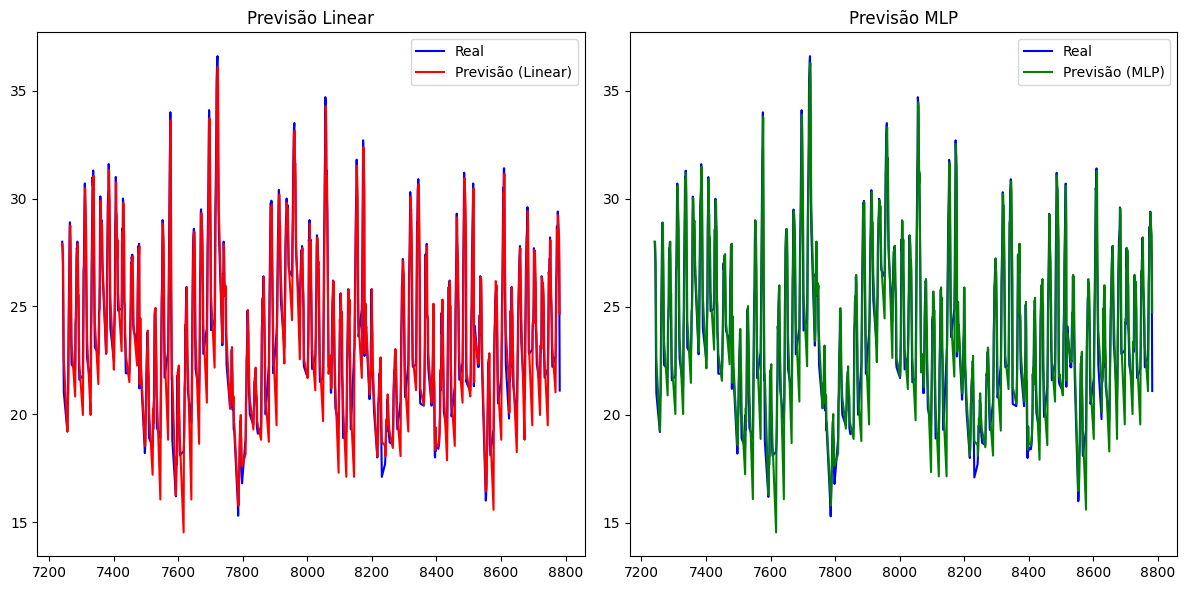

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Passo 1: Carregar o arquivo CSV
file_path = '/content/INMET_S_RS_A801_PORTO ALEGRE - JARDIM BOTANICO_01-01-2024_A_31-12-2024.CSV'

# Carregar os dados especificando o separador e a codificação correta
df = pd.read_csv(file_path, delimiter=';', encoding='latin1', header=8)

# Exibindo as primeiras linhas para verificar se as colunas estão corretamente separadas
#print(df.head())

# Verificando os nomes das colunas
#print(df.columns)

# Remover a coluna "Unnamed: 19", que está vazia
df = df.drop(columns=['Unnamed: 19'])

# Substituir as vírgulas por ponto nas colunas numéricas
numeric_columns = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)'
]

# Substituir vírgulas por ponto e converter para tipo float
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Criar a coluna 'temperatura_futura' com os valores da próxima linha
df['temperatura_futura'] = df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].shift(-1)

# Remover a última linha, pois ela terá NaN na coluna 'temperatura_futura'
df = df.dropna()

# Passo 3: Dividir os dados em treino e teste
X = df[['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]  # Variável de entrada
y = df['temperatura_futura']  # Variável de saída (temperatura do dia seguinte)

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Verificar o tamanho dos conjuntos
print(f'Tamanho do conjunto de treino: {len(X_train)}')
print(f'Tamanho do conjunto de teste: {len(X_test)}')

# Passo 4: Criar os modelos de Machine Learning

## Modelo 1: Regressão Linear
modelo_linear = LinearRegression()

# Treinar o modelo de regressão linear
modelo_linear.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_linear = modelo_linear.predict(X_test)

# Calcular o erro quadrático médio para o modelo linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Regressão Linear): {mse_linear}')

## Modelo 2: Rede Neural MLP
#1 camada #modelo_mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)
#adaptative
modelo_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), learning_rate='adaptive', max_iter=1000)

#/modelo_mlp = MLPRegressor(
#    hidden_layer_sizes=(100, 50),  # 2 camadas ocultas
#    #activation='relu',  # Função de ativação ReLU
#    #solver='adam',  # Algoritmo de otimização Adam
#    learning_rate='adaptive',  # Taxa de aprendizado adaptativa
#    #learning_rate_init=0.01,  # Taxa de aprendizado inicial
#    #batch_size=64,  # Tamanho do lote
#    #early_stopping=True,  # Early stopping
#    #tol=1e-4,  # Critério de tolerância
#    max_iter=1000  # Máximo de 1000 iterações
#)#/




# Treinar o modelo MLP
modelo_mlp.fit(X_train, y_train)


import joblib

# Salvar os modelos treinados
joblib.dump(modelo_linear, 'modelo_linear.pkl')  # Para regressão linear
joblib.dump(modelo_mlp, 'modelo_mlp.pkl')  # Para rede neural

print("Modelos salvos com sucesso!")

# Previsões no conjunto de teste
y_pred_mlp = modelo_mlp.predict(X_test)

# Calcular o erro quadrático médio para o modelo MLP
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f'Mean Squared Error (MLP): {mse_mlp}')

# Passo 5: Visualizar os resultados
plt.figure(figsize=(12, 6))

# Plotando as previsões do modelo de Regressão Linear
plt.subplot(1, 2, 1)
plt.plot(y_test.index, y_test, label='Real', color='blue')
plt.plot(y_test.index, y_pred_linear, label='Previsão (Linear)', color='red')
plt.title('Previsão Linear')
plt.legend()

# Plotando as previsões do modelo MLP
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Real', color='blue')
plt.plot(y_test.index, y_pred_mlp, label='Previsão (MLP)', color='green')
plt.title('Previsão MLP')
plt.legend()

plt.tight_layout()
plt.show()
